# XGBoost

In [1]:
from Functions import get_result, plot_precision_recall_vs_threshold, plot_roc_curve, save_metrics_to_json
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import pandas as pd

Load the datasets for training (remember they are scaled)

In [2]:
filenames = ['X_train.pkl', 'Y_train.pkl', 'X_val.pkl', 'Y_val.pkl', 'X_test.pkl', 'Y_test.pkl']
data_folder = '../data/'
dataframes = [pd.read_pickle(data_folder + filename) for filename in filenames]
X_train, Y_train, X_val, Y_val, X_test, Y_test = dataframes

In [3]:
# The scores we want to look at
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

#### Hyperparameter Tuning

In [4]:
# We'll need the count of each class for a hyperparameter
risk_count = Y_train.value_counts()

In [5]:
param_grid = {
    'n_estimators': [100, 250, 500, 1000],          # Number of trees
    'max_depth': [5, 10, 25, 75],                   # Maximum depth of a tree
    'learning_rate': [0.1, 0.5, 1, 2.5],            # Step size shrinkage used in update to prevent overfitting
    'objective': ['binary:logistic'],               # The learning task and the corresponding learning objective
    'eval_metric': ['aucpr'],                       # Evaluation metrics for validation data
    'scale_pos_weight': [1, 100, 250, 500, 1000,    # Control the balance of positive and negative weights (for imbalance)
                         risk_count[0]/risk_count[1]] # Typical value to consider
}

In [6]:
# Initialize the RandomForestClassifier
xgb = XGBClassifier()

# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                               n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1,
                               scoring=scoring, refit='f1') # We use f1 for the refit to find the parameters that maximize that


In [ ]:
xgb_random.fit(X_train, Y_train)

In [ ]:
# Look at the results of the hyperparameter tuning
xgb_random_result_df = pd.DataFrame(xgb_random.cv_results_['params'])
xgb_random_result_df['Mean_Accuracy'] = xgb_random.cv_results_['mean_test_accuracy']
xgb_random_result_df['Mean_Recall'] = xgb_random.cv_results_['mean_test_recall']
xgb_random_result_df['Mean_Precision'] = xgb_random.cv_results_['mean_test_precision']
xgb_random_result_df['Mean_f1'] = xgb_random.cv_results_['mean_test_f1']
xgb_random_result_df['Rank_Recall'] = xgb_random.cv_results_['rank_test_recall']
xgb_random_result_df['Rank_Precision'] = xgb_random.cv_results_['rank_test_precision']
xgb_random_result_df['Rank_F1'] = xgb_random.cv_results_['rank_test_f1']
xgb_random_result_df.sort_values('Rank_F1')

,scale_pos_weight,objective,n_estimators,max_depth,learning_rate,eval_metric,Mean_Accuracy,Mean_Recall,Mean_Precision,Mean_f1,Rank_Recall,Rank_Precision,Rank_F1
9,1000.000000,binary:logistic,1000,10,1.0,aucpr,0.997212,0.390625,0.222295,0.283173,9,7,1
46,100.000000,binary:logistic,250,10,0.1,aucpr,0.997168,0.393229,0.219432,0.281546,6,10,2
11,1000.000000,binary:logistic,1000,5,0.5,aucpr,0.997161,0.393229,0.218891,0.281054,6,13,3
42,250.000000,binary:logistic,1000,5,0.5,aucpr,0.997179,0.390625,0.219263,0.280726,9,11,4
14,250.000000,binary:logistic,500,5,0.5,aucpr,0.997161,0.393229,0.218448,0.280701,6,15,5
37,1000.000000,binary:logistic,1000,10,0.1,aucpr,0.997194,0.388021,0.219852,0.280505,13,9,6
44,100.000000,binary:logistic,1000,10,0.5,aucpr,0.997212,0.385417,0.220563,0.280423,15,8,7
34,709.791667,binary:logistic,500,10,0.5,aucpr,0.997194,0.385417,0.219114,0.279249,15,12,8
21,500.000000,binary:logistic,500,10,0.1,aucpr,0.997194,0.385417,0.218852,0.279047,15,14,9
6,500.000000,binary:logistic,250,10,0.1,aucpr,0.997146,0.390625,0.216680,0.278567,9,16,10


From the above results we see that the lower scale_pos_weight often perform worse compared to the higher ones. Since we have a imbalanced dataset, this make good sense.

Lets take the parameters that resulted in the best performance and test it on our test set and see how well it is doing.

In [9]:
# Evaluate the Best Model
print(f"Best Parameters: {xgb_random.best_params_}")
best_xgb_params = xgb_random.best_params_

Best Parameters: {'scale_pos_weight': 1000, 'objective': 'binary:logistic', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 1, 'eval_metric': 'aucpr'}


In [ ]:
best_xgb = XGBClassifier(**best_xgb_params)
best_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
# Save the best model
best_xgb.save_model('Saved models/xgb_best_model.json')

In [12]:
# Predict on the test set
test_predictions = best_xgb.predict_proba(X_test)[:, 1]

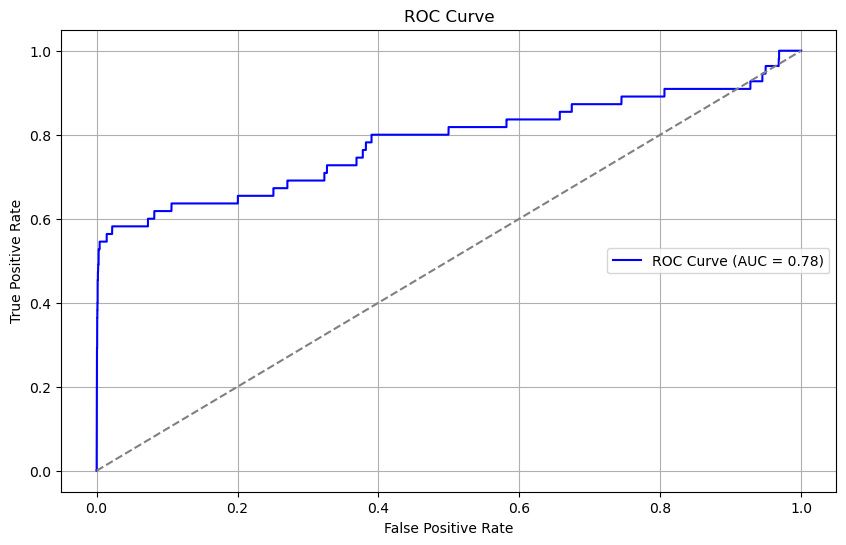

In [ ]:
plot_roc_curve(Y_test, test_predictions)

/home/ykh/Repos/CreditCardApproval/Algorithms/Functions.py:36: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


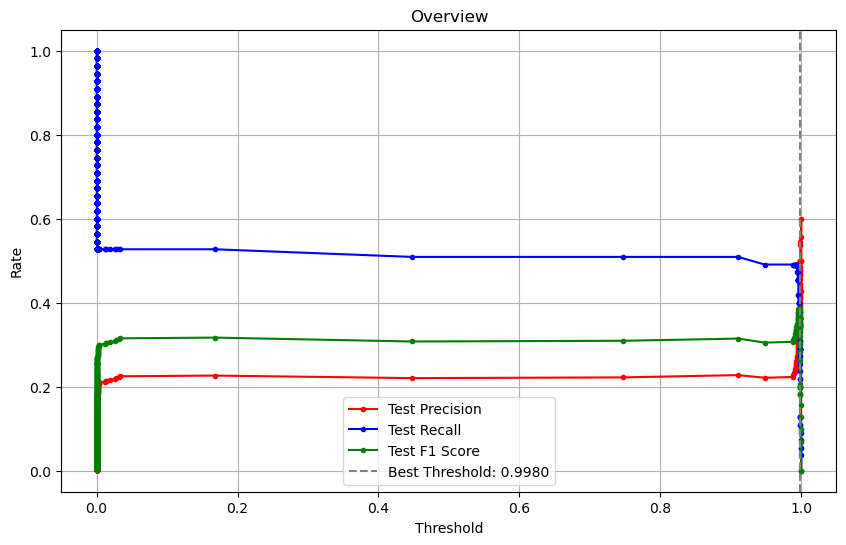

In [ ]:
best_threshold = plot_precision_recall_vs_threshold('Test', Y_test, test_predictions)

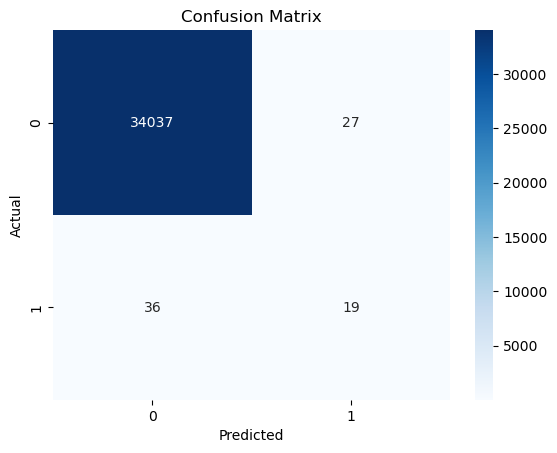

Recall       = 0.35
Precision    = 0.41
F1           = 0.38


In [15]:
result_1 = get_result(Y_test, test_predictions, best_threshold)

Lets merge the training and validation set and predict on the test set to see if the model can perform better with more training data.



In [16]:
# Initialize the RandomForestClassifier with the best hyperparameters from the tuning phase
xgb = XGBClassifier(**best_xgb_params)

In [17]:
# Train the model
xgb.fit(pd.concat([X_train, X_val]), pd.concat([Y_train, Y_val]))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
# Predict on the test set
test_predictions = best_xgb.predict_proba(X_test)[:, 1]

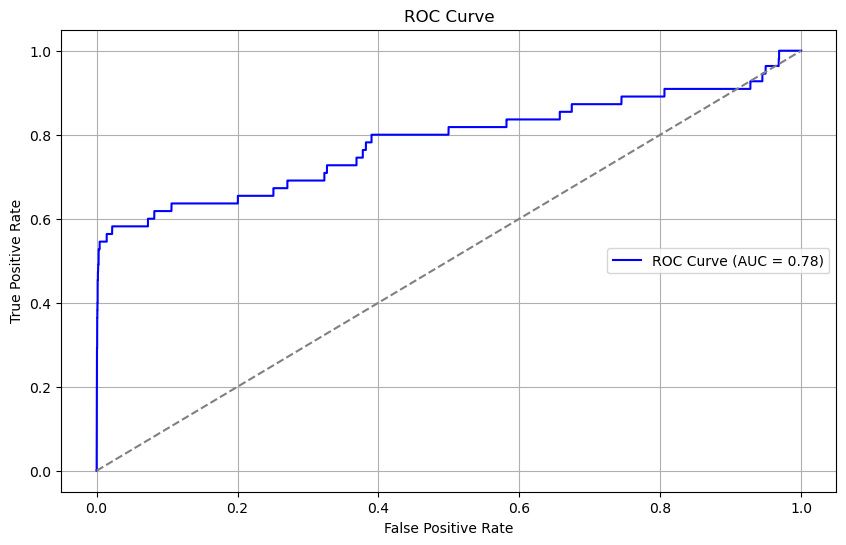

In [19]:
plot_roc_curve(Y_test, test_predictions)

/home/ykh/Repos/CreditCardApproval/Algorithms/Functions.py:36: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


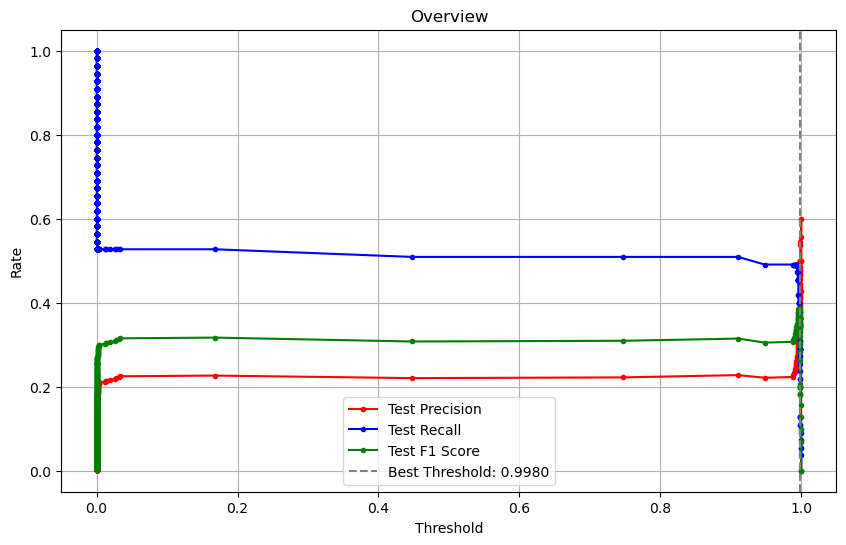

In [20]:
best_threshold = plot_precision_recall_vs_threshold('Test', Y_test, test_predictions)

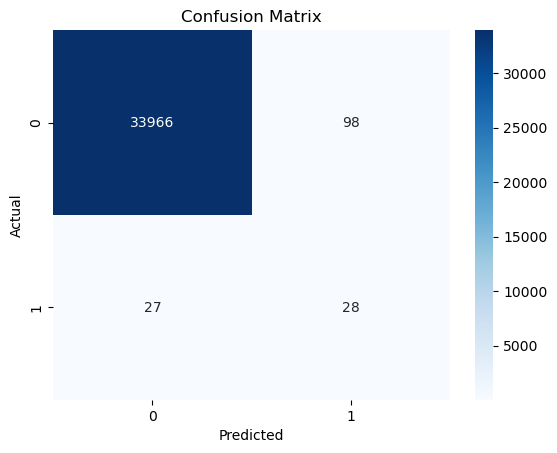

Recall       = 0.51
Precision    = 0.22
F1           = 0.31


In [21]:
result_2 = get_result(Y_test, test_predictions)

In [22]:
if result_2['f1'] > result_1['f1']:
    xgb.save_model('Saved models/xgb_best_model.json') # Overwrite the previous best model
    save_metrics_to_json('XGBoost', result_2['recall'], result_2['precision'], result_2['f1'])
    print('By training our model on more data, we achived a higher performance')
else:
    save_metrics_to_json('XGBoost', result_1['recall'], result_1['precision'], result_1['f1'])
    print('The first model we found, through hyperparameter tuning, is still our best model.')
    print('It had the following scores:')
    print('Recall       =', round(result_1['recall'], 2))
    print('Precision    =', round(result_1['precision'], 2))
    print('F1           =', round(result_1['f1'], 2))

The first model we found, through hyperparameter tuning, is still our best model.
It had the following scores:
Recall       = 0.35
Precision    = 0.41
F1           = 0.38
